In [1]:
#Set current directory
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)
print(SCRIPT_DIR)

#Configuration
large = 20; med = 12; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          'xtick.direction': 'out',  
          'ytick.direction': 'out',  
          'xtick.minor.visible': True,  
          'ytick.minor.visible': True,
          'xtick.major.size': 8,
          'xtick.minor.size': 4,
          'ytick.major.size': 8,
          'ytick.minor.size': 4,
          'lines.linewidth': 1.75}
plt.rcParams.update(params)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\Daniel SB\Documents\GitHub


Using CAMB 1.4.0 installed at /Users/danielsb/opt/anaconda3/envs/camb/lib/python3.9/site-packages/camb
Note: redshifts have been re-sorted (earliest first)


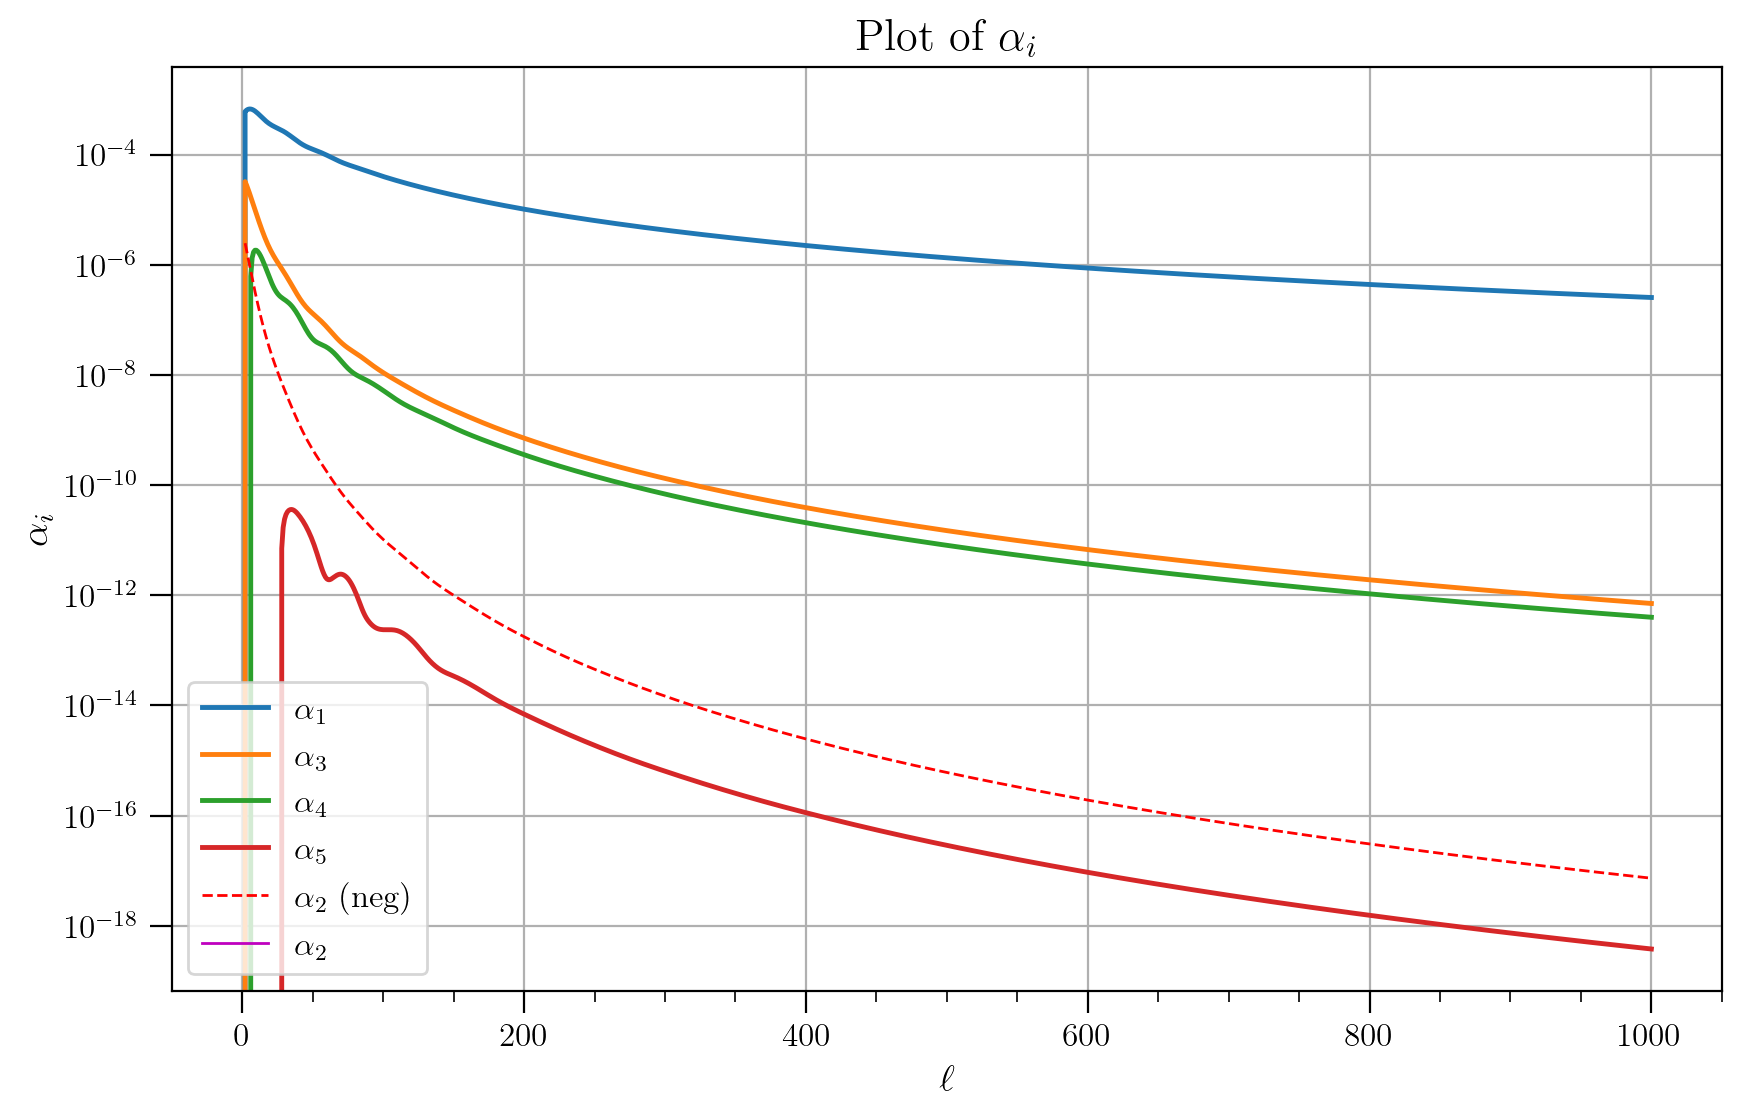

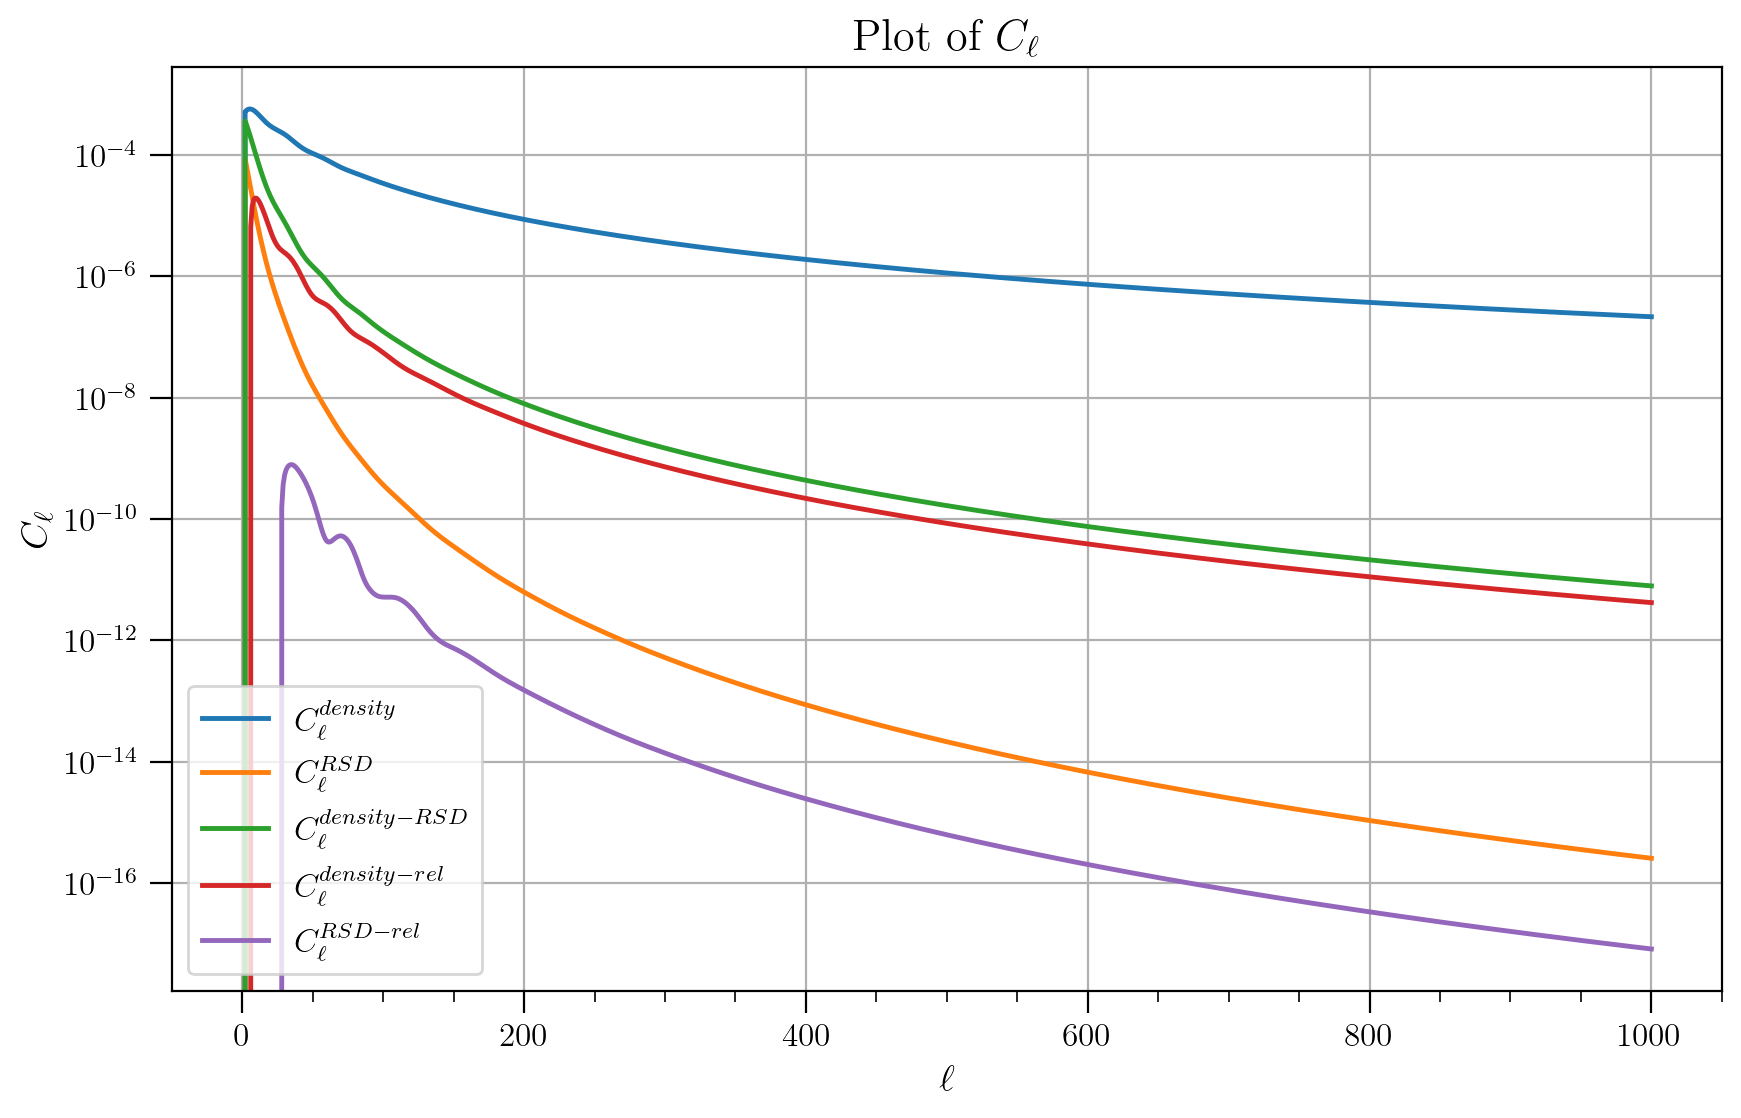

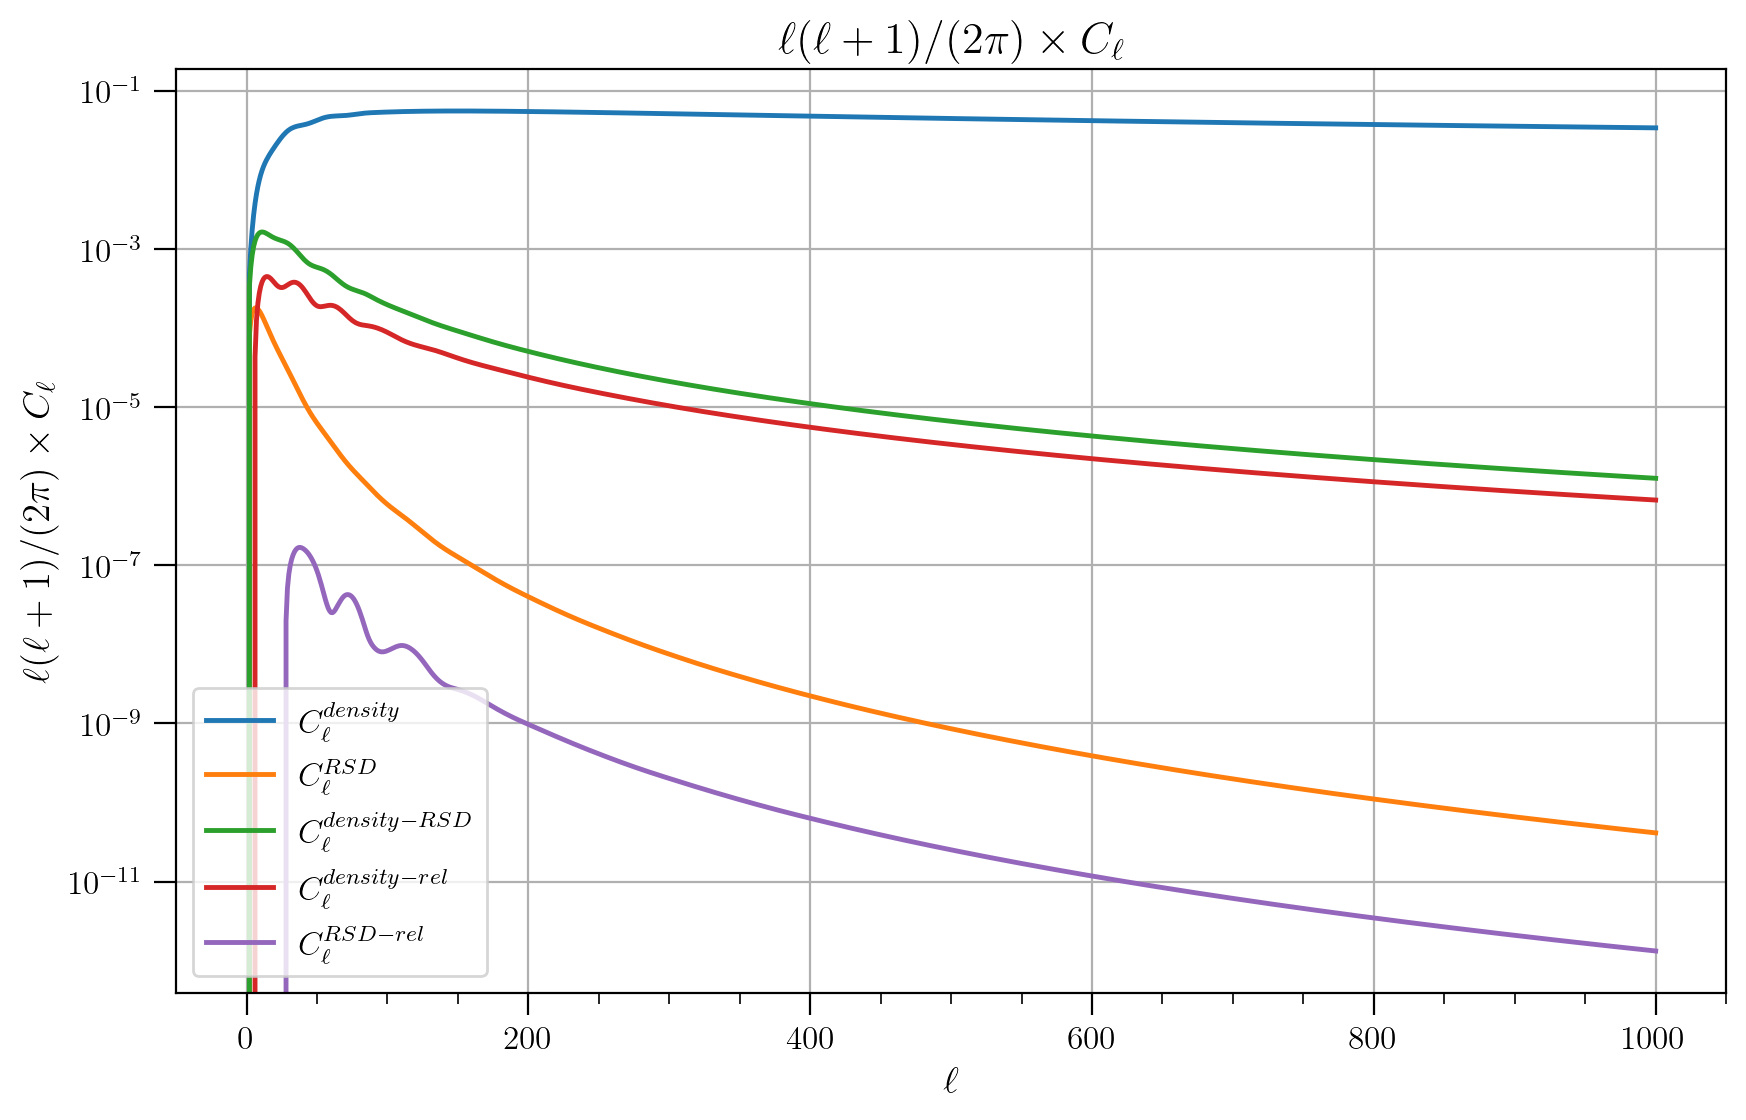

<Figure size 640x480 with 0 Axes>

In [2]:
%run alphas_calculation.py

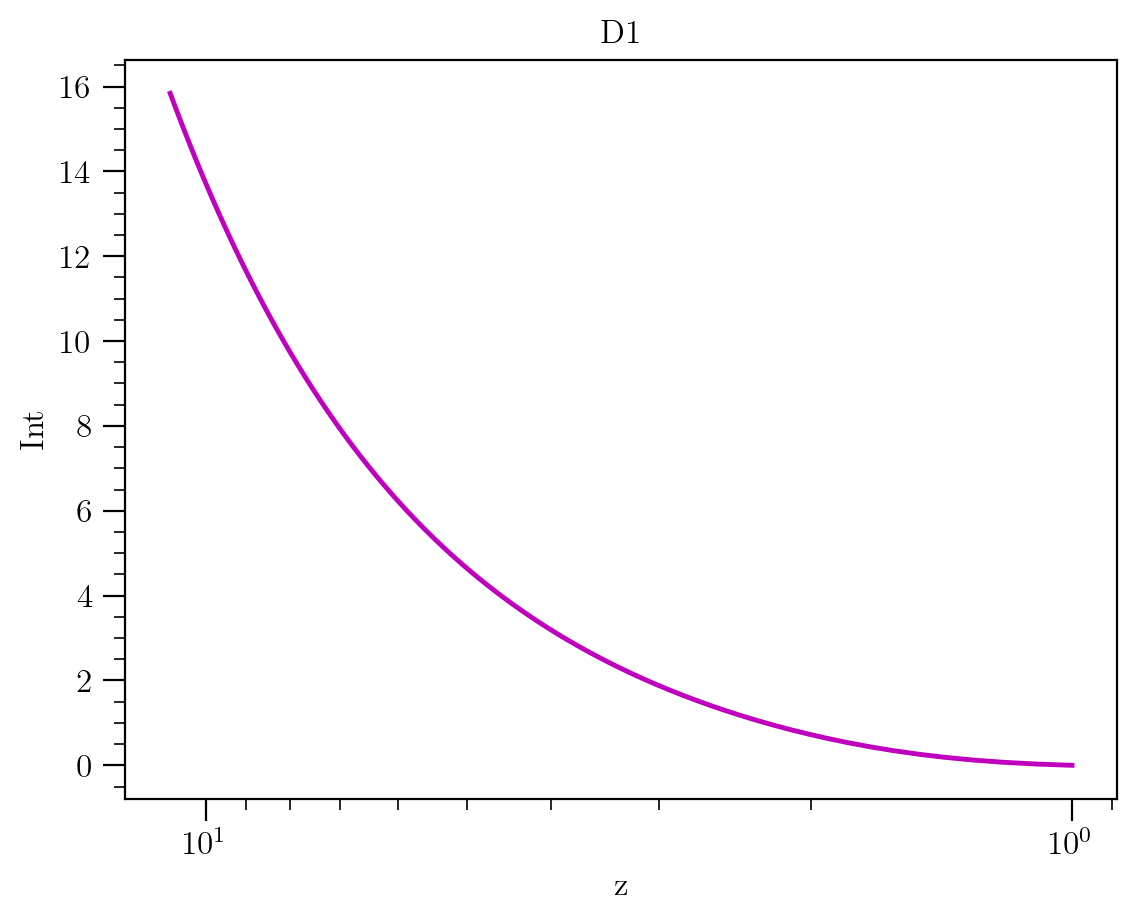

<Figure size 640x480 with 0 Axes>

In [2]:
%run class_cosmo_quantities_old.py

In [3]:
# Define a parameter file out of the parameters used in alphas_calculation.py

params = {
    'Omega_m' : 0.31,
    'Omega_Lambda' : 0.69,
    'H_0' : 67.66,
    'ombh2' : 0.02236,
    'omch2' : 0.1200,
    'mnu' : 0.06,
    'omk' : 0,
    'tau' : 0.0544,
    'As' : 2.100549e-9,    
    'ns' : 0.9652,
    'r' : 0,
    'z' : 0.15,
    'sigma' : 0.02,
    'bias_F' : 1.,
    'bias_B' : 1.5,
    'lmax' : 1000
}

In [4]:
params

{'Omega_m': 0.31,
 'Omega_Lambda': 0.69,
 'H_0': 67.66,
 'ombh2': 0.02236,
 'omch2': 0.12,
 'mnu': 0.06,
 'omk': 0,
 'tau': 0.0544,
 'As': 2.100549e-09,
 'ns': 0.9652,
 'r': 0,
 'z': 0.15,
 'sigma': 0.02,
 'bias_F': 1.0,
 'bias_B': 1.5,
 'lmax': 1000}

In [5]:
params['Omega_m']

0.31

In [6]:
from alphas_calculation import alphas
import numpy as np

my_alphas = alphas(**params)

Using CAMB 1.3.6 installed at c:\Users\Daniel SB\anaconda3\envs\envcamb\lib\site-packages\camb


In [7]:
alpha4, Cell4 = my_alphas.calculate_alpha_4()

In [8]:
alpha5, Cell5 = my_alphas.calculate_alpha_5()

In [9]:
from class_cosmo_quantities_old import cosmo_quantities

keys_quants = ['z', 'Omega_m', 'H_0', 'Omega_Lambda']

params_quants = {key: params[key] for key in keys_quants}

my_quants = cosmo_quantities(**params_quants)

In [10]:
my_quants.calculate_comoving_distance()

array(640.88407455)

In [11]:
my_quants.calculate_Hubble(), my_quants.calculate_Hubble_cal()

(72.91824802802451, 63.40717219828218)

In [12]:
my_quants.calculate_f(), my_quants.calculate_G()

(-7.925513363277084, -0.9558847938722497)

In [13]:
my_quants.calculate_G_dot()

array([7.57587771])

In [14]:
my_quants.calculate_G_dot_()

TypeError: object of type 'float' has no len()

In [15]:
params_quants['z'] = [0.15, 0.25, 0.35, 0.45, 0.55]

In [16]:
params_quants

{'z': [0.15, 0.25, 0.35, 0.45, 0.55],
 'Omega_m': 0.31,
 'H_0': 67.66,
 'Omega_Lambda': 0.69}

In [17]:
my_quants = cosmo_quantities(**params_quants)

my_quants.calculate_comoving_distance()

array([ 640.88407455, 1041.10275627, 1419.52582392, 1776.53148988,
       2112.83720655])

In [18]:
my_quants.calculate_f(), my_quants.calculate_G()

(array([-7.91850572, -5.24942622, -4.10278004, -3.46425866, -3.05729782]),
 array([-0.95503961, -1.07797133, -1.20245909, -1.32851688, -1.45627559]))

In [19]:
my_quants.calculate_G_dot()

# This is wrong, G_dot needs to be an array of the same shape as z

array([[ 7.56917921,  5.0178467 ,  3.92178506,  3.31143218,  2.92242449],
       [ 8.54178477,  5.66261749,  4.42571684,  3.73693635,  3.29794293],
       [ 9.52666946,  6.31552849,  4.93601075,  4.16781251,  3.67820227],
       [10.52402047,  6.97670381,  5.45276378,  4.60414254,  4.06327481],
       [11.53492211,  7.64686227,  5.97653773,  5.04640083,  4.45357918]])

In [20]:
gdot = my_quants.calculate_G_dot()

np.shape(gdot)

(5, 5)

In [21]:
my_quants.calculate_G_dot_()

array([ 89.06861857,  95.27046745, 102.14973224, 109.7739184 ,
       118.22569836])

In [22]:
my_quants.calculate_Hubble_cal()

array([63.4071722 , 61.60776461, 60.40718838, 59.66678868, 59.28270329])

In [24]:
my_quants.calculate_G_dot_() / my_quants.calculate_Hubble_cal()

array([1.40470889, 1.54640358, 1.69101948, 1.83978258, 1.99426969])

In [23]:
my_quants.H_0, my_quants.z

(67.66, [0.15, 0.25, 0.35, 0.45, 0.55])

In [58]:
params_quants['z']

[0.15, 0.25, 0.35, 0.45, 0.55]

In [41]:
for k in params_quants['z']:
    print(k)

0.15
0.25
0.35
0.45
0.55
